# Практическая работа №2

## 1. Подготовка к обработке изображения

- Для того, чтобы результат (изображение) открывался сразу в Jupyter'e, использовались такие функции, как _plt.imshow()_, _plt.show()_ и _plt.axis('off')_ (для сокрытия координатных осей) 


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def show_image(image):
    '''
    Outputs the original image as a grayscale image, which is a nested array of pixel intensity values
    
    :param image: nested array of intensities which represents original image
    :type image: int[[]]
    
    :return: nothing
    :rtype: None
    '''
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(image, cmap = 'gray')
    plt.show()

def broke_intensity(image):
    '''
    Distorts the intensity of the original image (shifting the intensity of each pixel by a certain amount)
    
    :param image: nested array of intensities which represents original image
    :type image: int[[]]
    
    :return: original imgage with broken intensities (pixels with intensity from 0 to 40 are missing)
    :rtype: int[[]]
    '''
    row = len(image)
    column = len(image[0])
    broken_image = zeros(row, column)
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            broken_image[i][j] = min(image[i][j] + 40, 255)
                
    broken_image[0][0] = 0
    broken_image[0][1] = 255
    return broken_image

def zeros(row, column):
    '''
    Generates a nested list of size (row, column) filled with zeros
    
    :param row: size of the first image dimension (width)
    :type row: int
    :param column: size of the second image dimension (length)
    :type column: int
    
    :return: list filled with zeros
    :rtype: int[[]]
    '''
    zeros_arr = [[0] * column for i in range(row)] 
    return zeros_arr 

def maximum(array):
    '''
    Finds the maximum value in the given nested array 
    
    :param array: array wich represents image
    :type image: int[[]]
    
    :return: the maximum value of the found element
    :rtype: int
    '''
    maximum = 0
    
    for i in range(len(array)):
        for j in range(len(array[0])):
            if (array[i][j] > maximum):
                maximum = array[i][j]
                
    return maximum

def minimum(array):
    '''
    Finds the minimum value in the given nested array 
    
    :param image: array wich represents image
    :type image: int[[]]
    
    :return: the minimum value of the found element
    :rtype: int
    '''
    minimum = 255
    
    for i in range(len(array)):
        for j in range(len(array[0])):
            if (array[i][j] < minimum):
                minimum = array[i][j]
                
    return minimum

def fix_intensity(image):
    '''
    Corrects the intensity of the supplied image by applying a piecewise linear intensity transformation function to it
    
    :param image: nested array of intensities which represents potentially broken image
    :type image: int[[]]
    
    :return: image with fixed intensities span 
    :rtype: int[[]]
    '''
    image[0][0] = 255
    maximum_elem = maximum(image)
    minimum_elem = minimum(image) 
    
    row = len(image)
    column = len(image[0])
    new_image = zeros(row, column)
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = int(((image[i][j] - minimum_elem) / (maximum_elem - minimum_elem)) * 255)
            
    return new_image

## 2. Калибровка параметров для cv2.Canny()

In [83]:
def average(image):
    '''
    Finds the arithmetic mean in the given image represented as a nested array
    
    :param image: nested array of intensities which represents original image
    :type image: int[[]]
    
    :return: arithmetic mean of intensities
    :rtype: int
    '''
    result = 0
    row = len(image)
    column = len(image[0])
    for i in range(row):
        for j in range(column):
            result = result + image[i][j]
        
    return result // (row * column)

def contour_selection(image):
    '''
    A function that applies a Canny filter, automatically fitting the values of the lower and upper parameters
    
    :param image: nested array of intensities which represents original image
    :type image: int[[]]
    
    :return: image which represents a set of obtained contours
    :rtype: int[[]]
    '''
    sigma = 0.33333
    avg = average(image)
    lower = int(max(0, (1.0 - sigma) * avg))
    upper = int(min(255, (1.0 + sigma) * avg))
    print(lower, upper, "average ->", avg)

    return cv2.Canny(np.array(np.uint8(image)), lower, upper)

## 3. Результат

- ### Исходное фото

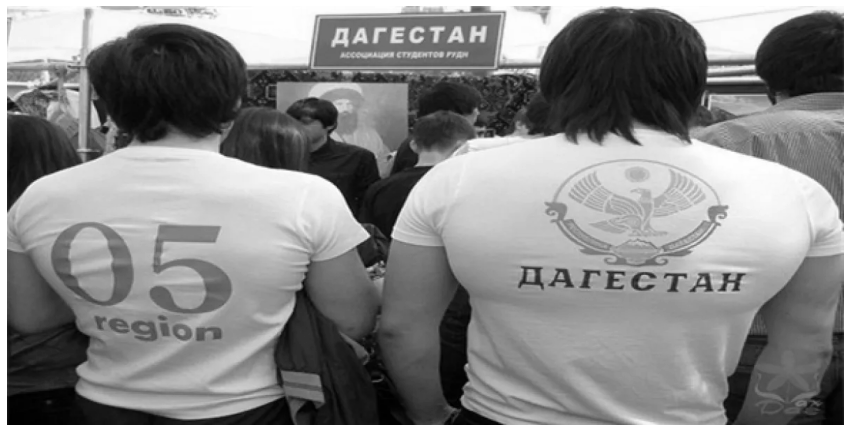

In [84]:
current_image_first = cv2.imread('05_region.jpg', 0)
show_image(current_image_first)

- ### Изображение с битой интенсивностью (отсутствуют пиксели, интенсивность которых меньше 40 единиц)

P.S. Так как plt.imshow() автоматически нормализует поданное ему изображение (ориентируясь на максимальное и минимальное значение интенсивности конкретных пикселей изображения), в край изображения были добавлены пиксели, интенсивность которых составляет соответственно 255 и 0, чтобы изображение с обрезанным интервалом интенсивности было корректно выведено.

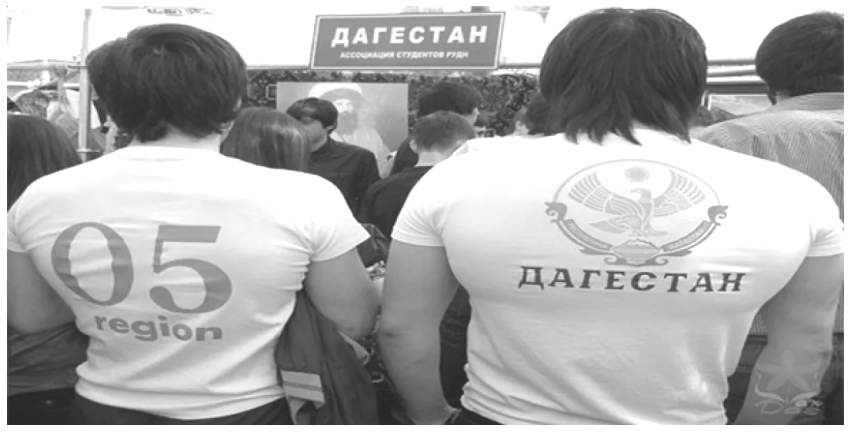

In [85]:
broken_image_first = broke_intensity(current_image_first)
show_image(broken_image_first)

- ### Изображение с восстановленной интенсивностью
Восстановление интенсивности реализовано с помощью кусочно-линейной функции преобразования

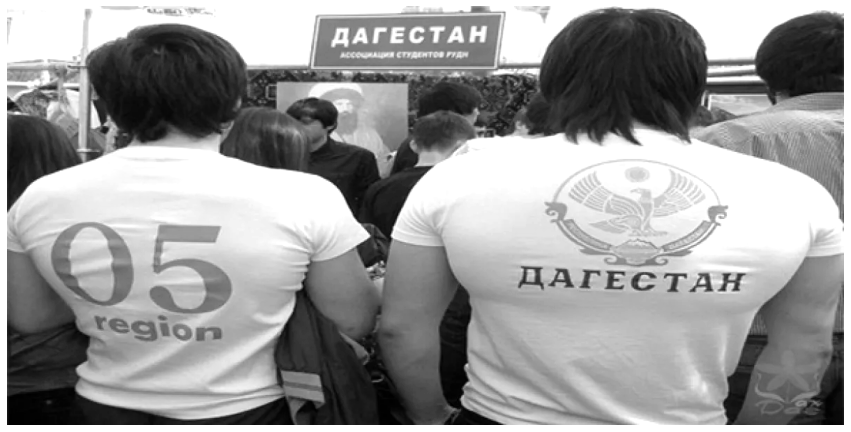

In [86]:
fixed_image_first = fix_intensity(broken_image_first)
show_image(fixed_image_first)

 - ### Контуры

98 197 average -> 148


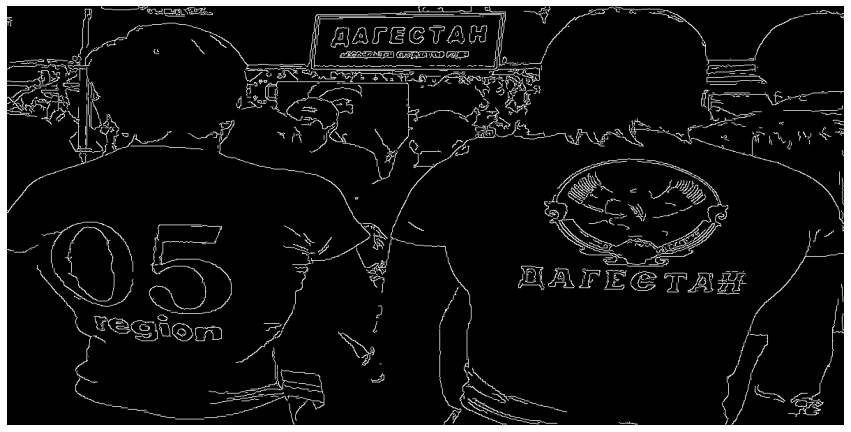

In [87]:
final_image_first = contour_selection(fixed_image_first)
show_image(final_image_first)